In [1]:
import os

path = "/Users/Public/Desktop/SOPs/"

### Data files

In [2]:
files = os.listdir(path)

In [3]:
files[0]

'AB - 1033 - Officer in trouble.docx'

In [8]:
agencies = []
call_actions = []
SOP_count_by_agency = {}

for file in files:
    ag = file.split(" - ")[0]
    agencies.append(ag)
    
    call = file.split(" - ")[1].strip()
    call_actions.append(call)
    try:
        SOP_count_by_agency[ag] += 1
    except:
        SOP_count_by_agency[ag] = 1
    
agency_list = set(agencies)
call_list = set(call_actions)

In [9]:
len(agency_list)

24

In [10]:
agency_list

{'AB',
 'BI',
 'BU',
 'CO',
 'DE',
 'DF PF',
 'DFPF',
 'ECVI',
 'FVRD  RDNO',
 'FVRD RDNO',
 'NW',
 'PO',
 'RI',
 'RM',
 'SC',
 'SCRD',
 'SLRD',
 'SQ',
 'SQ- PROP',
 'SX',
 'UN',
 'VA',
 'WP',
 'WV'}

## Total Number of agencies: 21

Misnamed documents:

> Should have two spaces between FVRD and RDNO
- FVRD RDNO - STAFF - Core staffing.docx 

> Should have a space between SQ and -
- SQ- PROP - Property lost, found or seized.docx

> Inconsistent Agency Name
- `DF PF` vs `DFPF` 

In [19]:
call_codes = []
for x in call_list:
    x = x.replace(".docx","")
    call_code = x.split(" ")[0]
    details = " ".join(x.split(" ")[1:])
    call_codes.append(call_code)
    call_codes.append(details)
call_codes = set(call_codes)

In [20]:
len(sorted(call_codes))

241

In [21]:
for x in sorted(call_codes):
    print(x)


1033
911
AB911
ABANDV
ABDUC
ACEM
ACF
ACRA
AIREM
ALARM
ALARMA
ALARMD
ALARMH
ALARMS
ALRM123
ANIMAL
ANNOY
ARREST
ARSON
ASIST
ASLT
ASLTI
ASLTSX
ASSGP
ASSMHA
ASSOA
ASSPFA
Abandoned 911 Cell
Abandoned 911 Landline
Abduction
Air Emergency
Alarm
Alarm Airport Check Point
Alarm DVERS
Alarm Hold Up
Alarm Silent Panic
Animal
Annoying Circumstances
Arrest
Arson
Assault
Assault In Progress
Assault Sexual
Assist General Public
Assist Mental Health Act
Assist Other Agency
Assist Police Fire Ambulance
BAIT
BAIT-Bait
BBQF
BNE
BNEI
BOMB
BORDR
BREACH
BYLAW
Bait Car Activated
Bomb Threat
Border Runner
Breach
Break And Enter
Break And Enter In Progress
Bylaw
CHECK
CHIM
COUNT
COUNTERFEIT
Car Activation
Check Wellbeing
Counterfeit Currency
DEMON
DISTB
DNA
DNA Collection
DOMI
DOMRPT
DRUGS
Demonstration Protest
Disturbance
Domestic In Progress
Domestic Report
Drugs
ELEC12
EXP123
EXPLOS
EXTORT
Explosives
Extortion
FBOAT
FIGHT
FIREAR
FOUNDP
FRAUD
Fight
Firearms For Pickup Transport
Found Person
Fraud
GAS1234
HA

## Total Number of Call Actions: 278

> Many variations within the same call action
- ex) `ECVI - THEFT Theft.docx`  vs `NW - THEFT.docx`

In [67]:
SOP_count_by_agency["DFPF"] += SOP_count_by_agency['DF PF']
SOP_count_by_agency["FVRD RDNO"] += SOP_count_by_agency['FVRD  RDNO']
SOP_count_by_agency["SQ"] += SOP_count_by_agency['SQ- PROP']

del SOP_count_by_agency['DF PF']
del SOP_count_by_agency['FVRD  RDNO']
del SOP_count_by_agency['SQ- PROP']


In [68]:
import pandas as pd

sorted_SOP_count = {k:v for k,v in sorted(SOP_count_by_agency.items(), key=lambda kv: kv[1],reverse=True )}
df = pd.Series(sorted_SOP_count).to_frame().T
df = df.melt(var_name="Agency", value_name="SOP number")

Text(0.5, 1.0, 'Number of SOP by Agency')

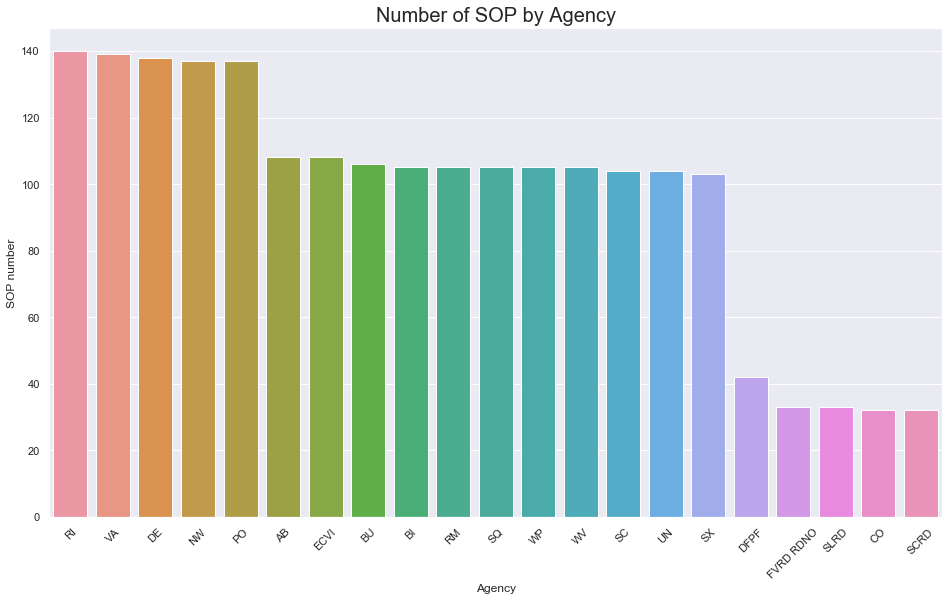

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

dim = (16,9)
fig, ax = plt.subplots(figsize=dim)
sns.set(palette="Blues_d")
sns.barplot(x="Agency", y="SOP number", data=df)
plt.xticks(rotation=45)
plt.title("Number of SOP by Agency", size=20)

# Process SOP Description

In [46]:
import os
import json
from docx import Document
from io import StringIO, BytesIO
import re

def parse_docx_dict(filepath):
    with open(filepath, 'rb') as f:
        source_stream = BytesIO(f.read())
    f.close()
    doc = Document(source_stream)
    paras = doc.paragraphs
    for p in paras:
        style = p.style.name
        text = p.text
        if style == 'Normal':
            return text
        else:
            print("Error")

In [44]:
with open(filepath, 'rb') as f:
    source_stream = BytesIO(f.read())
f.close()
doc = Document(source_stream)
paras = doc.paragraphs
res = dict()
head1, head2 = None, None
    

In [45]:
for p in paras:
    style = p.style.name
    text = p.text
    
    print(style)
    print(text)
    print('\n')

Normal
This is the SOP for the 1033 – Officer in trouble event type.


Heading 1
call taker


Style1
Create a call


Style1
Questions


Style1
Are there weapons involved?


Style1
What is the exact location, i.e. backyard, alley?


Style1
Is the member in uniform or plain clothes?


Style1
Are there other members at the scene?


Style1
Can you see a police vehicle? If so, where? What type of vehicle (i.e. marked / unmarked)? Is there a vehicle identification number visible?


Heading 1
dispatcher


Style1
Activate the channel marker tone


Style1
Broadcast the unit call sign and 10-33 at the location provided


Style1
Attempt to contact the unit/member in question, if the unit ID is not known call the unit at the location given


Style1
If voice contact is made with the unit, determine their status


Style1
If voice contact is not made repeat attempt to contact the unit/member


Style1
Create a call


Style1
Assign a member


Style1
Notify the Duty NCO / Watch Commander


Style1
Assign

In [40]:
jsons = list()

for f in files:
    filepath = path + f
    jsn = parse_docx_dict(filepath)
    jsons.append(jsn)

KeyError: None

In [ ]:
call_situations = dict()
situation_adjust = [
    'animal bites'
]
situation_reg = f"({'|'.join(situation_adjust)})"
for df in jsons:
    for k, v in df['call taker'].items():
        k = k.lower().strip()
        isMatch = re.search(situation_reg, k)
        k = k if not isMatch else isMatch.group()
        if k in call_situations:
            call_situations[k].append(v)
        else:
            call_situations[k] = [v]

In [ ]:
call_situations_json = json.dumps(call_situations, indent = 4)
print(call_situations_json)

In [ ]:
outfile_name = 'data/interim/sample_call_situations.txt'
with open(outfile_name, 'w') as outfile:
    json.dump(call_situations_json, outfile)
outfile.close()